# Sampleo por Rechazo

Es importante mantener la idea de que los algoritmos de numeros pseudo aleatorios solo nos brindan un numero entre 0 y 1 con distribucion uniforme.

Si queremos samplear una V.A $X$, vimos 2 maneras de hacerlo:

- Si conocemos $F_X$, utilizamos el método de la **funcion inversa**.
- Si **NO** conocemos a $F_X$ pero justo $X$ de distribuye de forma *normal*, podeoms utilizar el método **Box Muller**.

Si no caemos en los 2 escenarios anteriores, debemos utilizar un nuevo método. En esta clase verémos el método de **sampleo por rechazo**.


# Paso a Paso del Método:


- **Elegir una Distribución de Propuesta $q(z)$**: Tiene que ser facil de muestrear y tiene que cubrir el mismo soporte (en la practica vale aproximarlo) a nuestra funcion objetivo $p(z)$. Idealmente $q(z)$ debe ser similar a $p(x)$.

- **Eleji a $K$:** Elegir una constante $K$ tal que $K \cdot q(z) \geq p(z)$

- **Generar $z_0$:** Realizar un sampleo de $q(z)$

- **Generar $u_0$:** Realizar un sampleo de $U_0 ∼ U[0, kq(z_0)]$

- **Aceptar o Rechazar:** Si $u_0 \leq p(z_0)$, aceptamos a $u_0$. Si no es así, la rechazamos.


# Objetivo


El objetivo va a ser samplear a la distribucion (no normalizada)

$$p(x) = e^{-\frac{x^2}{2}} \left( \sin^2(6+x) + 3 \cdot \cos^2(x) \cdot \sin^2(4x) + 1 \right)
,$$

cuya distribucion acumulada se ve muy muy dificil de encontrar.

# Ejercicio 1

Graficar la funcion $p(x)$ ¿Cuál es su soporte?


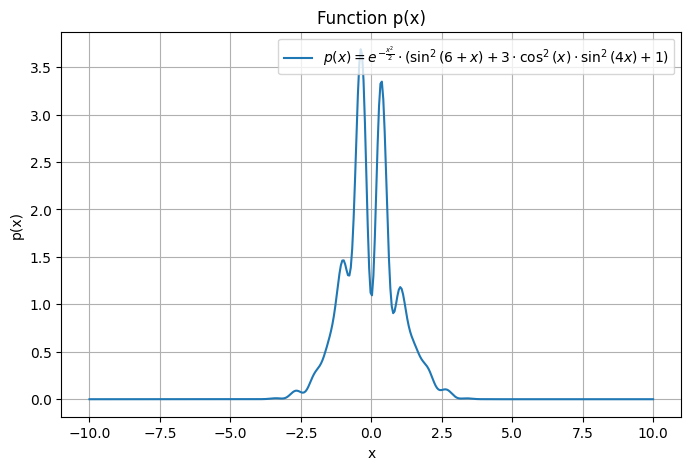

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Redefine p(x) as before
def p(x):
    term1 = np.exp(-x**2 / 2)
    term2 = np.sin(6 + x)**2
    term3 = 3 * np.cos(x)**2 * np.sin(4 * x)**2
    return term1 * (term2 + term3 + 1)

# Generate values for x
x_vals = np.linspace(-10, 10, 400)
y_vals = p(x_vals)

# Plotting the function p(x)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label=r'$p(x) = e^{-\frac{x^2}{2}} \cdot \left( \sin^2(6+x) + 3 \cdot \cos^2(x) \cdot \sin^2(4x) + 1 \right)$')
plt.title('Function p(x)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.legend()
plt.show()


# Ejercicio 2

Utilizar el método de Sampleo por Rechazo.


2.1  
- Utilizar una Uniforme(a,b) como $q(z)$
- Encontrar un $K_1$ válido
- ¿Cual es la proporcion de aceptacion para nuestro sampleo?
- Realizar un histograma de la aproximacion de $p(z)$

2.2
- Utilizar una Normal($\mu, σ^2$) como $q(z)$
- Encontrar un $K_2$ válido.
- ¿Cual es la proporcion de aceptacion para nuestro sampleo?
- Realizar un histograma de la aproximacion de $p(z)$


OPCIONAL (Recomendado):

- Para practicar sus habilidades en sampleo, utilizar unicamente Uniformes(0,1) para realizar este ejericio.

- Hacer un plot mostrando en color rojo si el par $(z_i, u_i) \geq p(z)$ y verde si sucede lo contrario.





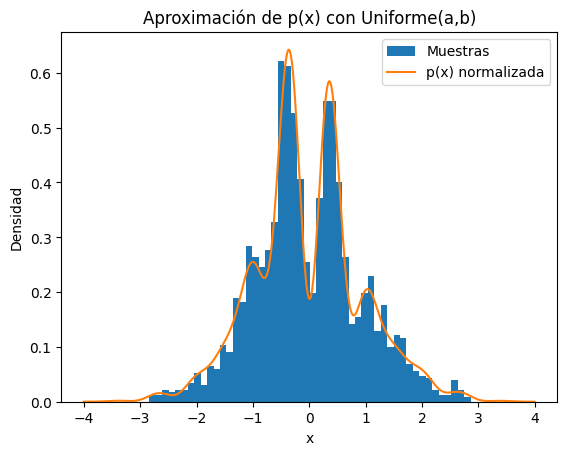

Proporción de aceptación (Uniforme): 0.2031


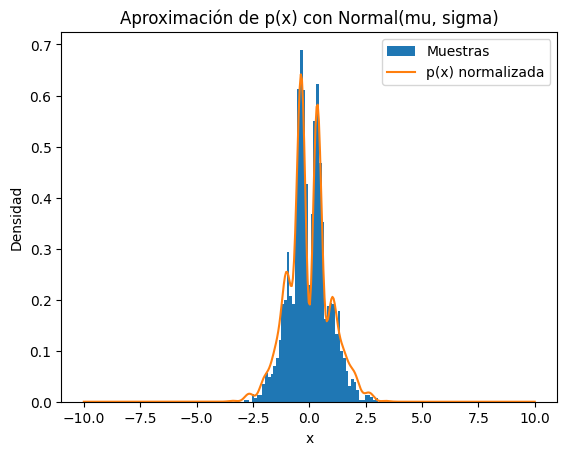

Proporción de aceptación (Normal): 0.2641


In [5]:
# Ejercicio 2 - Sampleo por Rechazo

# Función objetivo p(x)
def p(x):
    term1 = np.exp(-x**2 / 2)
    term2 = np.sin(6 + x)**2
    term3 = 3 * np.cos(x)**2 * np.sin(4 * x)**2
    return term1 * (term2 + term3 + 1)

# Ejercicio 2.1 - CASO UNIFORME
a = -4  # Límite inferior del soporte
b = 4  # Límite superior del soporte
K1 = 3.5 # Encontrado manualmente

# Número de muestras
N = 10000

# Muestreo por rechazo
muestras_uniforme = []
for _ in range(N):
    z = np.random.uniform(a, b)
    u = np.random.uniform(0, K1)
    if u <= p(z):
        muestras_uniforme.append(z)

# Proporción de aceptación
proporcion_aceptacion_uniforme = len(muestras_uniforme) / N

# Histograma
plt.hist(muestras_uniforme, bins=50, density=True, label='Muestras')
x_vals = np.linspace(a, b, 400)
plt.plot(x_vals, p(x_vals) / np.trapz(p(x_vals), x_vals), label='p(x) normalizada')
plt.title('Aproximación de p(x) con Uniforme(a,b)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

print(f'Proporción de aceptación (Uniforme): {proporcion_aceptacion_uniforme}')

# Ejercicio 2.2 - CASO NORMAL
mu = 0  # Media de la distribución normal
sigma = 2  # Desviación estándar de la distribución normal
K2 = 4  # Encontrado manualmente

# Muestreo por rechazo
muestras_normal = []
for _ in range(N):
    z = np.random.normal(mu, sigma)
    u = np.random.uniform(0, K2)
    if u <= p(z):
        muestras_normal.append(z)

# Proporción de aceptación
proporcion_aceptacion_normal = len(muestras_normal) / N

# Histograma
plt.hist(muestras_normal, bins=50, density=True, label='Muestras')
x_vals = np.linspace(-10, 10, 400)
plt.plot(x_vals, p(x_vals) / np.trapz(p(x_vals), x_vals), label='p(x) normalizada')
plt.title('Aproximación de p(x) con Normal(mu, sigma)')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.show()

print(f'Proporción de aceptación (Normal): {proporcion_aceptacion_normal}')

# Ejercicio 3

Responder:

- Cual función $q(z)$ aproxima mejor a p(z)? Cual es la proporcion de aceptacion para cada una?




The Normal distribution q(z) is likely the better approximation to p(z) due to its shape and higher acceptance rate compared to the Uniform distribution.